In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and Inspect Dataset ---

In [4]:
merged_dataset = pd.read_csv("C:/Users/Muhammad Mitkar/Desktop/LSN/merged_datasetokis.csv")

In [5]:
print(merged_dataset.info())
print(merged_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB
None
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [6]:
print(merged_dataset.describe(include='all'))

                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385



# --- Data Cleaning ---

In [7]:
merged_dataset.drop_duplicates(inplace=True)
merged_dataset.dropna(inplace=True)

# --- Language Distribution ---

In [8]:
print(merged_dataset['Language'].value_counts())

Language
English       2382
French        1997
Spanish       1812
Russian       1687
Dutch         1538
Arabic        1530
Turkish       1471
Tamil         1445
Hindi         1052
Chinese       1000
Korean        1000
Urdu          1000
Thai          1000
Japanese      1000
Romanian      1000
Persian       1000
Estonian       999
Portugese      997
Pushto         993
Swedish        992
Indonesian     975
Latin          953
Portugeese     736
Italian        694
Sweedish       673
Malayalam      591
German         465
Danish         424
Kannada        366
Greek          358
Name: count, dtype: int64


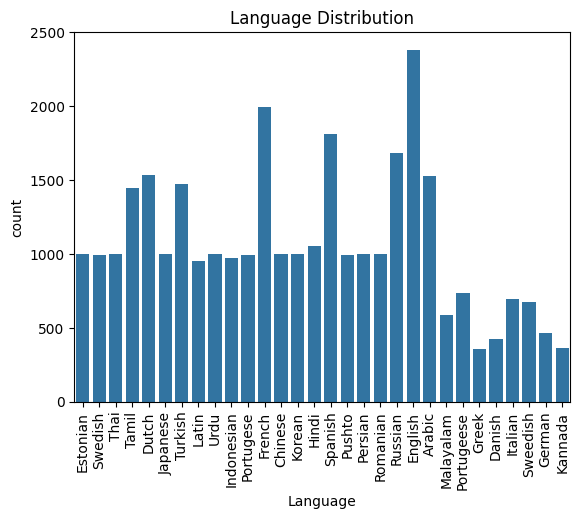

In [9]:
sns.countplot(data=merged_dataset, x='Language')
plt.title('Language Distribution')
plt.xticks(rotation=90)
plt.show()

# Visualizing text length distribution


Text Length Statistics:
count    32130.000000
mean       282.595394
std        266.823399
min          1.000000
25%        141.000000
50%        212.000000
75%        356.000000
max      19088.000000
Name: Text_Length, dtype: float64


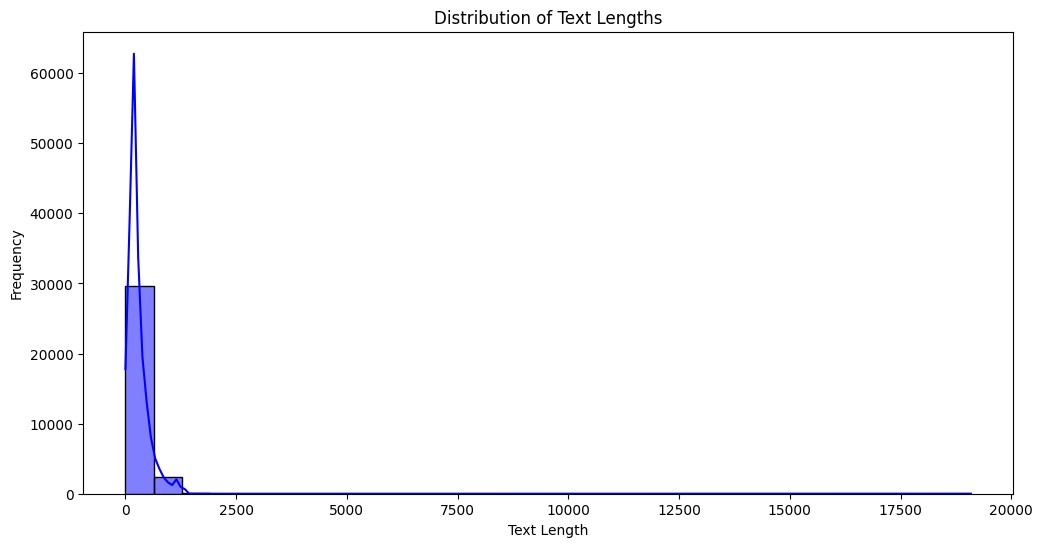

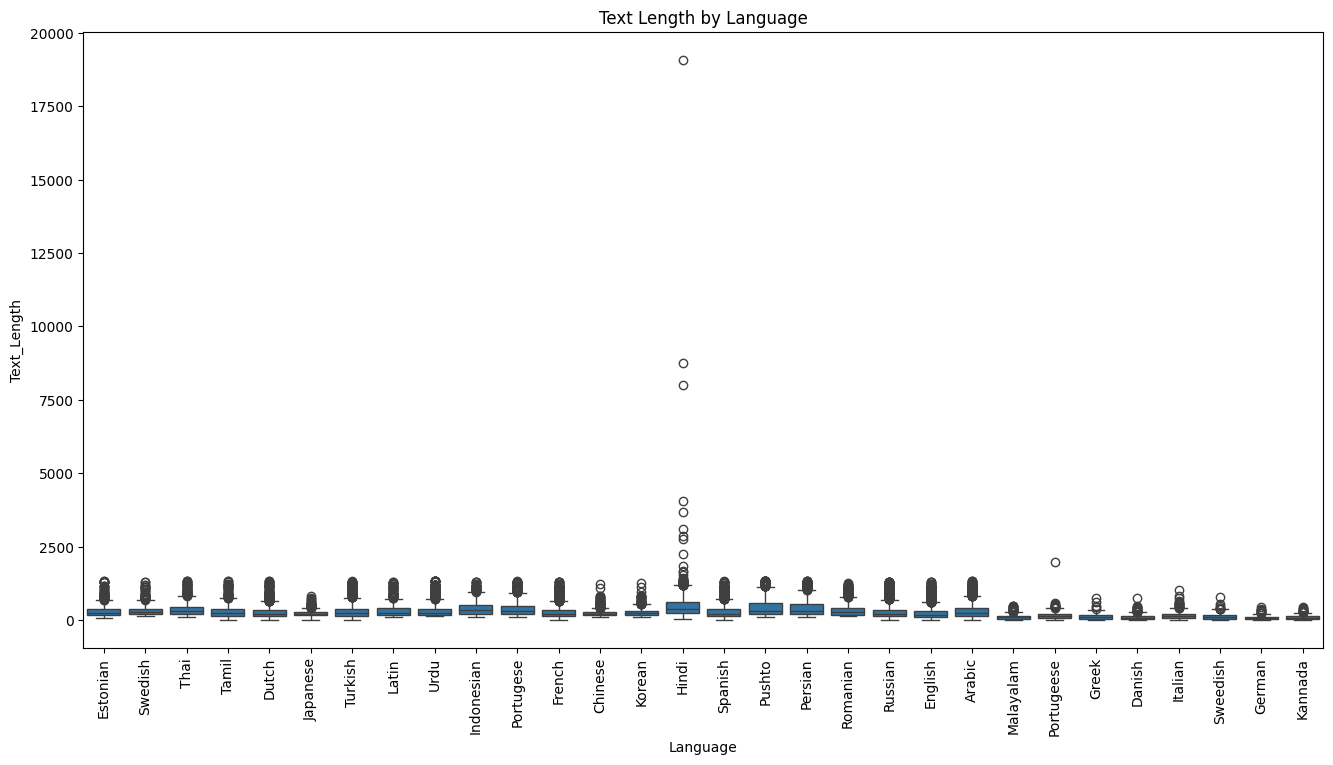

In [10]:
# 1. Analyzing Text Length
if 'Text' in merged_dataset.columns:
    # Adding a column for text length
    merged_dataset['Text_Length'] = merged_dataset['Text'].apply(len)

    # Summary statistics for text length
    print("\nText Length Statistics:")
    print(merged_dataset['Text_Length'].describe())

    # Visualizing text length distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(merged_dataset['Text_Length'], bins=30, kde=True, color='blue')
    plt.title("Distribution of Text Lengths")
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.show()

    # Text length by language
    plt.figure(figsize=(16, 8))
    sns.boxplot(data=merged_dataset, x='Language', y='Text_Length')
    plt.title("Text Length by Language")
    plt.xticks(rotation=90)
    plt.show()


In [11]:
# 2. Number of Unique Languages
unique_languages = merged_dataset['Language'].nunique()
print(f"\nNumber of unique languages: {unique_languages}")



Number of unique languages: 30


# --- Unique Languages Count ---


In [12]:
# 3. Count Unique and Duplicate Texts
if 'Text' in merged_dataset.columns:
    unique_texts = merged_dataset['Text'].nunique()
    total_texts = len(merged_dataset['Text'])
    duplicate_texts = total_texts - unique_texts
    print(f"\nTotal Texts: {total_texts}")
    print(f"Unique Texts: {unique_texts}")
    print(f"Duplicate Texts: {duplicate_texts}")

    # Display a few duplicate texts if any
    if duplicate_texts > 0:
        print("\nDuplicate Texts Example:")
        print(merged_dataset[merged_dataset.duplicated(subset=['Text'], keep=False)].head())



Total Texts: 32130
Unique Texts: 32126
Duplicate Texts: 4

Duplicate Texts Example:
                  Text    Language  Text_Length
23272     suggestions.     English           12
25011  dedos cruzados.  Portugeese           15
26117          pardon?      French            7
26151     suggestions.      French           12
26649          pardon?       Dutch            7


# --- Word Analysis (Most Common Words and WordCloud) ---

[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Mitkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most Common Words:
[('de', 24062), ('en', 7327), ('la', 7223), ('د', 5801), ('په', 4754), ('के', 4497), ('و', 4340), ('que', 3641), ('در', 3558), ('में', 3546)]


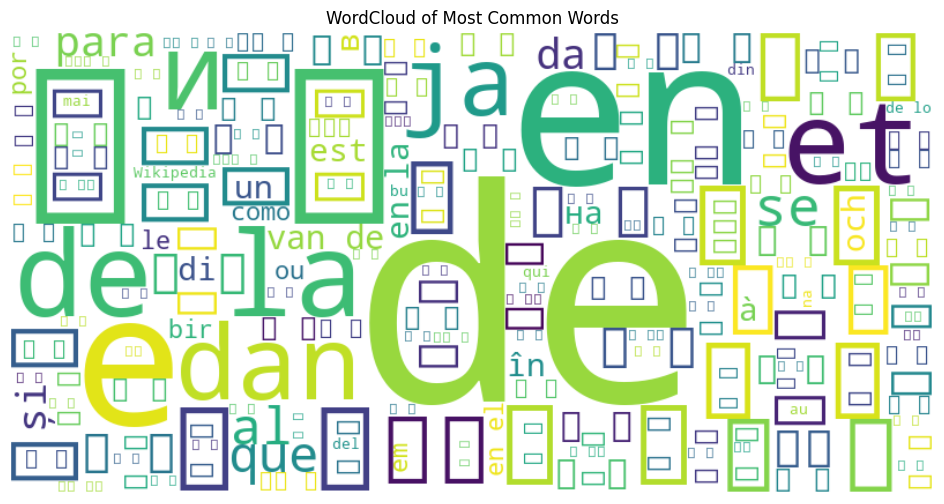

In [13]:
from collections import Counter
import nltk
from wordcloud import WordCloud

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

if 'Text' in merged_dataset.columns:
    # Tokenize and filter stopwords
    all_words = ' '.join(merged_dataset['Text']).split()
    filtered_words = [word for word in all_words if word.lower() not in stop_words]

    # Most common words
    most_common_words = Counter(filtered_words).most_common(10)
    print("\nMost Common Words:")
    print(most_common_words)

    # WordCloud Visualization
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud of Most Common Words")
    plt.show()


In [14]:
# 5. Correlation Matrix (for numeric features)
numeric_columns = merged_dataset.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 1:
    plt.figure(figsize=(10, 6))
    correlation_matrix = merged_dataset[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()


NameError: name 'np' is not defined

# --- Pie Chart for Language Distribution ---

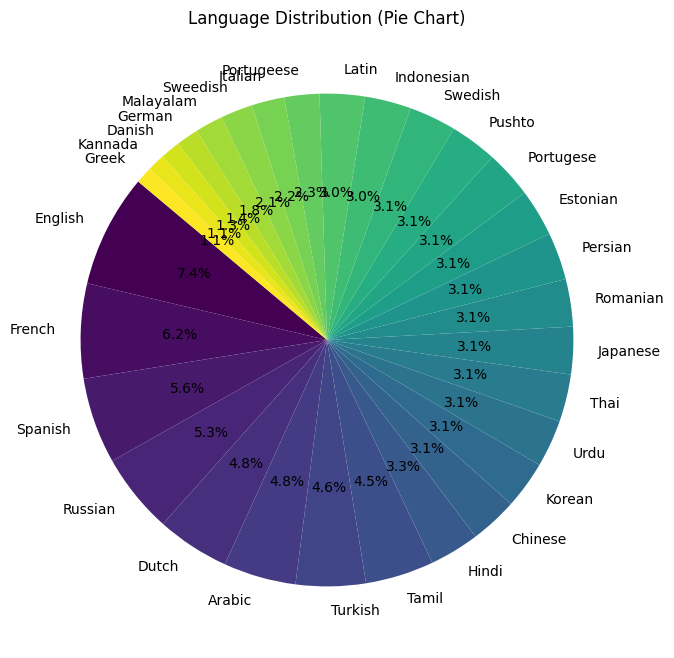

In [18]:
# 6. Pie Chart for Language Distribution
plt.figure(figsize=(8, 8))
merged_dataset['Language'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title("Language Distribution (Pie Chart)")
plt.ylabel("")
plt.show()
